In [1]:
%load_ext autoreload
%autoreload 2
import torch
from trainer import Trainer
from config import get_config
from utils import prepare_dirs, save_config
from data_loader import get_test_loader, get_train_valid_loader

set config.best=False to load the latest model, instead of the best validation model.

In [2]:
config, unparsed = get_config()
config.is_train = False
config.use_tensorboard = False
config.best = False

# config.std=0.03

In [27]:
# data_loader = get_test_loader(config.data_dir, config.batch_size,num=100,translate=config.use_translate)
data_loader = get_test_loader(config.data_dir, config.batch_size,translate=config.use_translate)



size=0
for i, (x, y) in enumerate(data_loader):
    size+= x.size()[0]
print(size)

10000


In [4]:
len(data_loader.sampler)

10000

In [5]:
# since is_train=False, it is in fact a "tester"
tester = Trainer(config, data_loader)
torch.manual_seed(config.random_seed)
acc = tester.test()
print(acc)

[*] Number of model parameters: 212,347
[*] Loading model from ./ckpt
[*] Loaded ram_6_8x8_2_uncertainty_0_intrinsic_0_ckpt.pth.tar checkpoint @ epoch 100
[*] Test Acc: 9812/10000 (98.00% - 2.00%)
0.9812


In [6]:
range_all=50
M=10

In [7]:
from copy import deepcopy 

from tqdm import tqdm_notebook as tqdm


original_RAM = []
new_config = deepcopy(config)
new_config.M=M
new_config.best=False
tester = Trainer(new_config, data_loader)

new_config.num_glimpses = range_all
accs = tester.test_for_all(range_all=range_all)
for i,acc in enumerate( accs ):
    num_steps = i+1
    original_RAM.append(  (num_steps,acc)  )
print(original_RAM[5])

  0%|          | 0/313 [00:00<?, ?it/s]

[*] Number of model parameters: 212,347
[*] Loading model from ./ckpt
[*] Loaded ram_6_8x8_2_uncertainty_0_intrinsic_0_ckpt.pth.tar checkpoint @ epoch 100


100%|██████████| 313/313 [08:36<00:00,  1.34s/it]

(6, 0.9912)


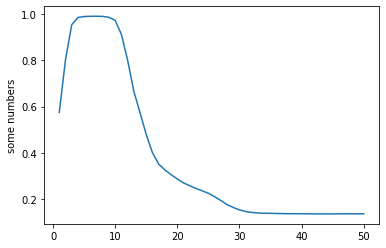

In [8]:
x1=[];y1=[]
for t in zip(original_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])

import matplotlib.pyplot as plt
plt.plot(x1,y1)
plt.ylabel('some numbers')
plt.show()

In [9]:
from copy import deepcopy 

v11_RAM = []
new_config = deepcopy(config)
new_config.uncertainty = True
new_config.intrinsic = True
new_config.M=M
new_config.best=False
tester = Trainer(new_config, data_loader)
new_config.num_glimpses = range_all
accs = tester.test_for_all(range_all=range_all)
for i,acc in enumerate( accs ):
    num_steps = i+1
    v11_RAM.append(  (num_steps,acc)  )
print(v11_RAM[5])

[*] Number of model parameters: 212,347
[*] Loading model from ./ckpt


  0%|          | 0/313 [00:00<?, ?it/s]

[*] Loaded ram_6_8x8_2_uncertainty_1_intrinsic_1_ckpt.pth.tar checkpoint @ epoch 100


100%|██████████| 313/313 [06:22<00:00,  1.03s/it]

(6, 0.9899)


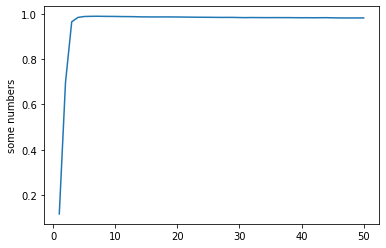

In [10]:
x1=[];y1=[]
for t in zip(v11_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])

import matplotlib.pyplot as plt
plt.plot(x1,y1)
plt.ylabel('some numbers')
plt.show()

In [28]:
from copy import deepcopy 

from tqdm import tqdm_notebook as tqdm

# l2 is enabled, l3 is enabled
v11_dynamic_RAM = []

new_config = deepcopy(config)
new_config.uncertainty = True
new_config.intrinsic = True
new_config.M=M
new_config.best=False
tester = Trainer(new_config, data_loader)
new_config.dynamic = True
new_config.num_glimpses = range_all


for exploration_rate in tqdm( [0,0.01,0.15,0.3,0.4,0.45] ):

    # since is_train=False, it is in fact a "tester"
    torch.manual_seed(config.random_seed)
    tester.config.exploration_rate = exploration_rate
    avg_num_glimpses,acc = tester.test()
    print( (avg_num_glimpses,acc) )
    v11_dynamic_RAM.append(  (avg_num_glimpses,acc)  )



[*] Number of model parameters: 212,347


[*] Loading model from ./ckpt
[*] Loaded ram_6_8x8_2_uncertainty_1_intrinsic_1_ckpt.pth.tar checkpoint @ epoch 100
[*] Test Acc: 1157/10000 (11.00% - 89.00%)
use dynamic
(1.0, 0.1157)
[*] Loading model from ./ckpt
[*] Loaded ram_6_8x8_2_uncertainty_1_intrinsic_1_ckpt.pth.tar checkpoint @ epoch 100
[*] Test Acc: 5314/10000 (53.00% - 47.00%)
use dynamic
(1.7606199999999999, 0.5314)
[*] Loading model from ./ckpt
[*] Loaded ram_6_8x8_2_uncertainty_1_intrinsic_1_ckpt.pth.tar checkpoint @ epoch 100
[*] Test Acc: 9368/10000 (93.00% - 7.00%)
use dynamic
(3.18758, 0.9368)
[*] Loading model from ./ckpt
[*] Loaded ram_6_8x8_2_uncertainty_1_intrinsic_1_ckpt.pth.tar checkpoint @ epoch 100
[*] Test Acc: 9792/10000 (97.00% - 3.00%)
use dynamic
(4.80767, 0.9792)
[*] Loading model from ./ckpt
[*] Loaded ram_6_8x8_2_uncertainty_1_intrinsic_1_ckpt.pth.tar checkpoint @ epoch 100
[*] Test Acc: 9873/10000 (98.00% - 2.00%)
use dynamic
(8.98847, 0.9873)
[*] Loading model from ./ckpt
[*] Loaded ram_6_8x8_2_unc

In [12]:
from copy import deepcopy 

from tqdm import tqdm_notebook as tqdm

# only the uncertanity loss
v10_RAM = []

v10_RAM = []
new_config = deepcopy(config)
new_config.uncertainty = True
new_config.intrinsic = False
new_config.M=M
new_config.best=False
tester = Trainer(new_config, data_loader)
new_config.num_glimpses = range_all
accs = tester.test_for_all(range_all=range_all)
for i,acc in enumerate( accs ):
    num_steps = i+1
    v10_RAM.append(  (num_steps,acc)  )
print(v10_RAM[5])



  0%|          | 0/313 [00:00<?, ?it/s]

[*] Number of model parameters: 212,347
[*] Loading model from ./ckpt
[*] Loaded ram_6_8x8_2_uncertainty_1_intrinsic_0_ckpt.pth.tar checkpoint @ epoch 100


100%|██████████| 313/313 [08:12<00:00,  1.35s/it]

(6, 0.9905)


In [13]:
from copy import deepcopy 

from tqdm import tqdm_notebook as tqdm

# l2 is enabled, l3 is not
v10_dynamic_RAM = []

new_config = deepcopy(config)
new_config.uncertainty = True
new_config.intrinsic = False
new_config.M=M
new_config.best=False
tester = Trainer(new_config, data_loader)
new_config.dynamic = True

new_config.num_glimpses = range_all

for exploration_rate in tqdm( [0,0.1,0.2,0.5,0.8,1,5,10] ):


    # since is_train=False, it is in fact a "tester"
    torch.manual_seed(config.random_seed)
    tester.config.exploration_rate = exploration_rate
    avg_num_glimpses,acc = tester.test()
    print( (avg_num_glimpses,acc) )
    v10_dynamic_RAM.append(  (avg_num_glimpses,acc)  )





[*] Number of model parameters: 212,347


[*] Loading model from ./ckpt
[*] Loaded ram_6_8x8_2_uncertainty_1_intrinsic_0_ckpt.pth.tar checkpoint @ epoch 100
[*] Test Acc: 958/10000 (9.00% - 91.00%)
use dynamic
(1.0, 0.0958)
[*] Loading model from ./ckpt
[*] Loaded ram_6_8x8_2_uncertainty_1_intrinsic_0_ckpt.pth.tar checkpoint @ epoch 100
[*] Test Acc: 6714/10000 (67.00% - 33.00%)
use dynamic
(1.90409, 0.6714)
[*] Loading model from ./ckpt
[*] Loaded ram_6_8x8_2_uncertainty_1_intrinsic_0_ckpt.pth.tar checkpoint @ epoch 100
[*] Test Acc: 7577/10000 (75.00% - 25.00%)
use dynamic
(2.16799, 0.7577)
[*] Loading model from ./ckpt
[*] Loaded ram_6_8x8_2_uncertainty_1_intrinsic_0_ckpt.pth.tar checkpoint @ epoch 100
[*] Test Acc: 7986/10000 (79.00% - 21.00%)
use dynamic
(2.48448, 0.7986)
[*] Loading model from ./ckpt
[*] Loaded ram_6_8x8_2_uncertainty_1_intrinsic_0_ckpt.pth.tar checkpoint @ epoch 100
[*] Test Acc: 9075/10000 (90.00% - 10.00%)
use dynamic
(2.89245, 0.9075)
[*] Loading model from ./ckpt
[*] Loaded ram_6_8x8_2_uncertainty_1

(6, 0.9912)
(6, 0.9905)
(6, 0.9899)


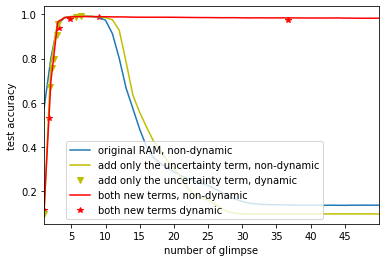

In [31]:
import matplotlib.pyplot as plt
import numpy as np
x1=[];y1=[]
for t in zip(original_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])
plt.plot(x1,y1,label="original RAM, non-dynamic")
print(original_RAM[5])

x1=[];y1=[]
for t in zip(v10_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])

plt.plot(x1,y1,"y",label="add only the uncertainty term, non-dynamic")
print(v10_RAM[5])

x1=[];y1=[]
for t in zip(v10_dynamic_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])
plt.plot(x1,y1,"yv",label="add only the uncertainty term, dynamic",zorder=2)

x1=[];y1=[]
for t in zip(v11_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])

plt.plot(x1,y1,"r",label="both new terms, non-dynamic")
print(v11_RAM[5])
x1=[];y1=[]
for t in zip(v11_dynamic_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])
plt.plot(x1,y1,"r*",label="both new terms dynamic",zorder=1)



plt.xticks(np.arange(0, 50, 5))
plt.xlim(1,50)
# plt.ylim(0,1)
plt.ylabel('test accuracy')
plt.xlabel('number of glimpse')
plt.legend(loc='center left', bbox_to_anchor=(0.05, 0.2))
# plt.show()
plt.savefig("test.png", dpi=300)

(1, 0.5749)
(1, 0.0958)
(1, 0.1157)


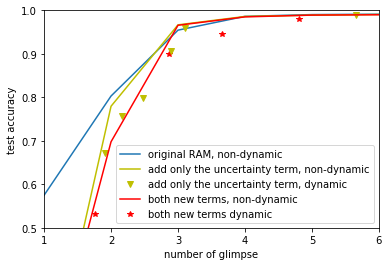

In [15]:
import matplotlib.pyplot as plt
import numpy as np
x1=[];y1=[]
for t in zip(original_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])
plt.plot(x1,y1,label="original RAM, non-dynamic")
print(original_RAM[0])

x1=[];y1=[]
for t in zip(v10_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])

plt.plot(x1,y1,"y",label="add only the uncertainty term, non-dynamic")
print(v10_RAM[0])

x1=[];y1=[]
for t in zip(v10_dynamic_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])
plt.plot(x1,y1,"yv",label="add only the uncertainty term, dynamic",zorder=2)

x1=[];y1=[]
for t in zip(v11_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])

plt.plot(x1,y1,"r",label="both new terms, non-dynamic")
print(v11_RAM[0])
x1=[];y1=[]
for t in zip(v11_dynamic_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])
plt.plot(x1,y1,"r*",label="both new terms dynamic",zorder=1)



plt.xticks(np.arange(0, 10, 1))
plt.xlim(1,6)
plt.ylim(0.5,1)
plt.ylabel('test accuracy')
plt.xlabel('number of glimpse')
# plt.xscale('log')
plt.legend(loc='center left', bbox_to_anchor=(0.20, 0.2))
plt.show()

In [16]:
from copy import deepcopy 

from tqdm import tqdm_notebook as tqdm

# only the intrinsic loss
v01_RAM = []

v01_RAM = []
new_config = deepcopy(config)
new_config.uncertainty = False
new_config.intrinsic = True
new_config.M=M
new_config.best=False
tester = Trainer(new_config, data_loader)
new_config.num_glimpses = range_all
accs = tester.test_for_all(range_all=range_all)
for i,acc in enumerate( accs ):
    num_steps = i+1
    v01_RAM.append(  (num_steps,acc)  )
print(v01_RAM[5])



  0%|          | 0/313 [00:00<?, ?it/s]

[*] Number of model parameters: 212,347
[*] Loading model from ./ckpt
[*] Loaded ram_6_8x8_2_uncertainty_0_intrinsic_1_ckpt.pth.tar checkpoint @ epoch 100


100%|██████████| 313/313 [06:32<00:00,  1.12s/it]

(6, 0.9908)


(1, 0.5749)
(1, 0.0958)
(1, 0.2694)
(1, 0.1157)


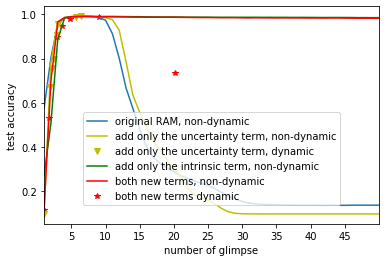

In [17]:
import matplotlib.pyplot as plt
import numpy as np
x1=[];y1=[]
for t in zip(original_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])
plt.plot(x1,y1,label="original RAM, non-dynamic")
print(original_RAM[0])

x1=[];y1=[]
for t in zip(v10_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])

plt.plot(x1,y1,"y",label="add only the uncertainty term, non-dynamic")
print(v10_RAM[0])

x1=[];y1=[]
for t in zip(v10_dynamic_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])
plt.plot(x1,y1,"yv",label="add only the uncertainty term, dynamic",zorder=2)

x1=[];y1=[]
for t in zip(v01_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])

plt.plot(x1,y1,"g",label="add only the intrinsic term, non-dynamic")
print(v01_RAM[0])


x1=[];y1=[]
for t in zip(v11_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])

plt.plot(x1,y1,"r",label="both new terms, non-dynamic")
print(v11_RAM[0])
x1=[];y1=[]
for t in zip(v11_dynamic_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])
plt.plot(x1,y1,"r*",label="both new terms dynamic",zorder=1)



plt.xticks(np.arange(0, 50, 5))
# plt.xlim(1,6)
plt.xlim(1,50)
# plt.ylim(0.5,1)
plt.ylabel('test accuracy')
plt.xlabel('number of glimpse')
# plt.xscale('log')
plt.legend(loc='center left', bbox_to_anchor=(0.10, 0.3))
plt.show()

(6, 0.9912)
(6, 0.9905)
(6, 0.9908)
(6, 0.9899)


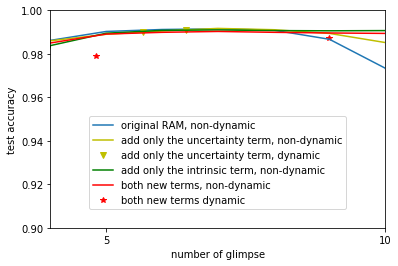

In [18]:
import matplotlib.pyplot as plt
import numpy as np
x1=[];y1=[]
for t in zip(original_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])
plt.plot(x1,y1,label="original RAM, non-dynamic")
print(original_RAM[5])

x1=[];y1=[]
for t in zip(v10_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])

plt.plot(x1,y1,"y",label="add only the uncertainty term, non-dynamic")
print(v10_RAM[5])

x1=[];y1=[]
for t in zip(v10_dynamic_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])
plt.plot(x1,y1,"yv",label="add only the uncertainty term, dynamic",zorder=2)

x1=[];y1=[]
for t in zip(v01_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])

plt.plot(x1,y1,"g",label="add only the intrinsic term, non-dynamic")
print(v01_RAM[5])


x1=[];y1=[]
for t in zip(v11_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])

plt.plot(x1,y1,"r",label="both new terms, non-dynamic")
print(v11_RAM[5])
x1=[];y1=[]
for t in zip(v11_dynamic_RAM):
    x,y = t[0]
    x1.append(x)
    y1.append(y)
#     print(t[0])
plt.plot(x1,y1,"r*",label="both new terms dynamic",zorder=1)



plt.xticks(np.arange(0, 50, 5))
plt.xlim(1,6)
plt.xlim(4,10)
plt.ylim(0.9,1)
plt.ylabel('test accuracy')
plt.xlabel('number of glimpse')
# plt.xscale('log')
plt.legend(loc='center left', bbox_to_anchor=(0.10, 0.3))
plt.show()